<a href="https://colab.research.google.com/github/ejekanshjain/easy-hacktoberfest/blob/main/GRO_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://manual.gromacs.org/archive/5.0.3/online/gro.html


In [ ]:
with open('/content/equilibration.gro', 'r') as file:
    lines = file.readlines()

atom_data = []
for line in lines[2:]:
    parts = line.split()
    if len(parts) == 9:
        atom_dict = {
            'residue': parts[0],
            'atom_name': parts[1],
            'atom_number': int(parts[2]),
            'x': float(parts[3]),
            'y': float(parts[4]),
            'z': float(parts[5]),
            'velocity_x': float(parts[6]),
            'velocity_y': float(parts[7]),
            'velocity_z': float(parts[8])
        }
        atom_data.append(atom_dict)

print(atom_data)


[{'residue': '1LYS', 'atom_name': 'BB', 'atom_number': 1, 'x': 5.705, 'y': 6.172, 'z': 2.129, 'velocity_x': -0.0778, 'velocity_y': -0.0022, 'velocity_z': -0.4383}, {'residue': '1LYS', 'atom_name': 'SC1', 'atom_number': 2, 'x': 5.944, 'y': 6.295, 'z': 2.251, 'velocity_x': -0.1549, 'velocity_y': -0.2587, 'velocity_z': 0.1241}, {'residue': '1LYS', 'atom_name': 'SC2', 'atom_number': 3, 'x': 6.087, 'y': 6.519, 'z': 2.334, 'velocity_x': 0.3969, 'velocity_y': -0.0417, 'velocity_z': -0.2314}, {'residue': '2ASP', 'atom_name': 'BB', 'atom_number': 4, 'x': 5.53, 'y': 5.869, 'z': 2.119, 'velocity_x': 0.0223, 'velocity_y': -0.188, 'velocity_z': 0.502}, {'residue': '2ASP', 'atom_name': 'SC1', 'atom_number': 5, 'x': 5.27, 'y': 5.938, 'z': 1.99, 'velocity_x': 0.244, 'velocity_y': 0.218, 'velocity_z': -0.246}, {'residue': '3THR', 'atom_name': 'BB', 'atom_number': 6, 'x': 5.409, 'y': 5.912, 'z': 2.498, 'velocity_x': 0.1593, 'velocity_y': 0.0776, 'velocity_z': 0.0535}, {'residue': '3THR', 'atom_name': 'S

In [ ]:
! pip install matplotlib


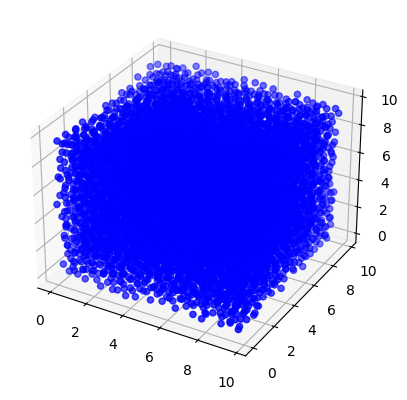

In [ ]:
# Visualizing the 3D positions of atoms

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = [atom['x'] for atom in atom_data]
y = [atom['y'] for atom in atom_data]
z = [atom['z'] for atom in atom_data]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='b', marker='o')

plt.show()


In [ ]:
# Center of Mass of the system, assuming all atoms have the same mass

total_mass = len(atom_data)
com_x = sum(atom['x'] for atom in atom_data) / total_mass
com_y = sum(atom['y'] for atom in atom_data) / total_mass
com_z = sum(atom['z'] for atom in atom_data) / total_mass

center_of_mass = (com_x, com_y, com_z)

print(center_of_mass)


(4.881348242017632, 4.877834140887069, 4.867172319542817)


In [ ]:
# Analyzing Velocities of the atoms

num_atoms = len(atom_data)

# Calculate mean velocities in x, y, and z directions
mean_velocity_x = sum(atom['velocity_x'] for atom in atom_data) / num_atoms
mean_velocity_y = sum(atom['velocity_y'] for atom in atom_data) / num_atoms
mean_velocity_z = sum(atom['velocity_z'] for atom in atom_data) / num_atoms

# Calculate the magnitude of the mean velocity (speed)
speed = (mean_velocity_x ** 2 + mean_velocity_y ** 2 + mean_velocity_z ** 2) ** 0.5

print(speed)


0.00012090960974376082


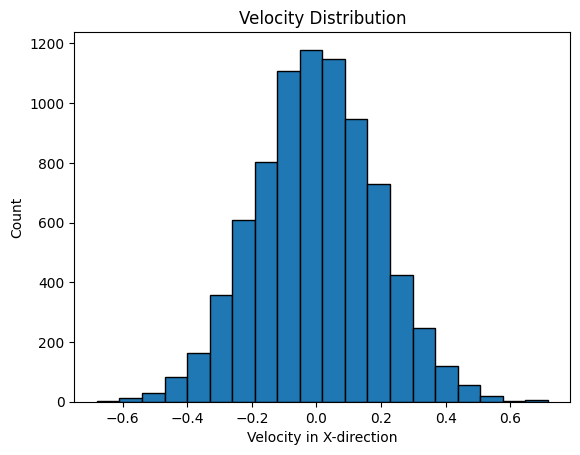

In [ ]:
# Velocity Distribution

import matplotlib.pyplot as plt

velocities = [atom['velocity_x'] for atom in atom_data]

plt.hist(velocities, bins=20, edgecolor='k')
plt.xlabel('Velocity in X-direction')
plt.ylabel('Count')
plt.title('Velocity Distribution')
plt.show()


In [ ]:
# Calculating kinetic energy of atoms assuming all atoms have the same mass

total_kinetic_energy = 0.0

for atom in atom_data:
    velocity_x = atom['velocity_x']
    velocity_y = atom['velocity_y']
    velocity_z = atom['velocity_z']
    mass = 1.0
    kinetic_energy = 0.5 * mass * (velocity_x ** 2 + velocity_y ** 2 + velocity_z ** 2)
    total_kinetic_energy += kinetic_energy

print(total_kinetic_energy)


417.27187105999906


In [ ]:
# Calculate the temperature based on Kinetic energy and equipartition theorem

num_atoms = len(atom_data)
k_B = 1.38e-23  # Boltzmann's constant in J/K

temperature = (2 * total_kinetic_energy) / (3 * num_atoms * k_B)

print(temperature)


2.50441811453158e+21
